In [1]:
import sys
import warnings

warnings.filterwarnings('ignore')

IN_COLAB = 'google.colab' in sys.modules

In [2]:
if IN_COLAB:
    !wget https://github.com/Ohtar10/icesi-nlp/raw/refs/heads/main/requirements.txt
    %pip install -r requirements.txt

In [3]:
if IN_COLAB:
    !wget https://github.com/Ohtar10/icesi-nlp/raw/refs/heads/main/Sesion1/percy_jackson_book_1.txt

# Análisis de Sentimientos en Percy Jackson

Este notebook analiza el sentimiento de las oraciones en el libro "The Lightning Thief" de Rick Riordan usando técnicas de NLP.

In [4]:
import pandas as pd
import numpy as np
import spacy

# Cargar spaCy
nlp = spacy.load('en_core_web_sm')

# Leer el libro
with open('./percy_jackson_book_1.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Procesar con spaCy
doc = nlp(text)

print(f"Total de caracteres: {len(text):,}")
print(f"Total de tokens: {len(doc):,}")
print(f"Total de oraciones: {len(list(doc.sents)):,}")

Total de caracteres: 505,955
Total de tokens: 127,898
Total de oraciones: 8,946


In [5]:
# Instalar VADER de NLTK para análisis de sentimientos
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\apapa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Crear el analizador de sentimientos VADER
sid = SentimentIntensityAnalyzer()

# Extraer oraciones y calcular sentimientos
sentences_data = []

for i, sent in enumerate(doc.sents):
    # Limpiar la oración
    sent_text = sent.text.strip()
    
    # Filtrar oraciones muy cortas o que no sean texto narrativo
    if len(sent_text) < 10 or sent_text.isupper():
        continue
    
    # Calcular sentimiento con VADER
    scores = sid.polarity_scores(sent_text)
    compound = scores['compound']  # Score combinado (-1 a 1)
    
    # Clasificar el sentimiento basado en compound score
    if compound >= 0.05:
        label = 'pos'
    elif compound <= -0.05:
        label = 'neg'
    else:
        label = 'neu'
    
    sentences_data.append({
        'sentence': sent_text,
        'neg': scores['neg'],
        'neu': scores['neu'],
        'pos': scores['pos'],
        'compound': compound,
        'label': label,
        'length': len(sent_text)
    })

# Crear DataFrame
df = pd.DataFrame(sentences_data)
print(f"Total de oraciones analizadas: {len(df)}")
df.head(10)

Total de oraciones analizadas: 8672


,sentence,neg,neu,pos,compound,label,length
0,BOOKS BY RICK RIORDAN\n\nPERCY JACKSON AND THE...,0.218,0.691,0.092,-0.8885,neg,366
1,The Red Pyramid\nThe Throne of Fire\nThe Serpe...,0.117,0.778,0.105,-0.1260,neg,245
2,THE HEROES OF OLYMPUS\nThe Lost Hero\nThe Son ...,0.032,0.843,0.125,0.9265,pos,771
3,All rights reserved.,0.000,1.000,0.000,0.0000,neu,20
4,"Published by Disney • Hyperion Books, an impri...",0.000,1.000,0.000,0.0000,neu,70
5,No\npart of this book may be reproduced or tra...,0.058,0.942,0.000,-0.2960,neg,242
6,For information address Disney • Hyperion Book...,0.000,1.000,0.000,0.0000,neu,95
7,ISBN 978-1-4231-3189-2\nVisit www.disneyhyperi...,0.000,1.000,0.000,0.0000,neu,145
8,I Accidentally Vaporize My Pre-algebra Teacher...,0.324,0.676,0.000,-0.3400,neg,49
9,Three Old Ladies Knit the Socks of Death\n3.,0.328,0.672,0.000,-0.5994,neg,43


In [7]:
# Distribución de sentimientos
print("Distribución de sentimientos:\n")
print(df['label'].value_counts())
print("\n")
print(df['label'].value_counts(normalize=True).mul(100).round(2))

Distribución de sentimientos:

label
neu    4702
neg    1990
pos    1980
Name: count, dtype: int64


label
neu    54.22
neg    22.95
pos    22.83
Name: proportion, dtype: float64


## Estadísticas de Sentimientos

In [8]:
# Estadísticas por sentimiento
print("Estadísticas de compound score:\n")
print(df.groupby('label')['compound'].describe())

Estadísticas de compound score:

        count      mean       std     min     25%     50%     75%     max
label                                                                    
neg    1990.0 -0.404130  0.202576 -0.9382 -0.5574 -0.3818 -0.2500 -0.0516
neu    4702.0  0.000141  0.003312 -0.0498  0.0000  0.0000  0.0000  0.0387
pos    1980.0  0.412802  0.184021  0.0516  0.2960  0.4019  0.5106  0.9468


## Oraciones Más Positivas

In [9]:
# Las 10 oraciones más positivas
print("Top 10 oraciones más positivas:\n")
for i, row in df.nlargest(10, 'compound').iterrows():
    print(f"Compound: {row['compound']:.3f} | Pos: {row['pos']:.3f}")
    print(f"{row['sentence']}\n")

Top 10 oraciones más positivas:

Compound: 0.947 | Pos: 0.416
“Few mortals have ever
done this and survived: Orpheus, who had great music skill; Hercules, who
had great strength; Houdini, who could escape even the depths of Tartarus.

Compound: 0.938 | Pos: 0.301
Thanks also to my cadre of middle-school beta testers: Travis
Stoll, clever and quick as Hermes; C. C. Kellogg, beloved as Athena; Allison
Bauer, clear-eyed as Artemis the Huntress; and Mrs. Margaret Floyd, the
wise and kindly seer of middle-school English.

Compound: 0.930 | Pos: 0.438
To reach his goal, he must first demonstrate great courage by
succeeding as a keeper, finding a new camper and bringing him safely to
Half-Blood Hill.”

Compound: 0.926 | Pos: 0.125
THE HEROES OF OLYMPUS
The Lost Hero
The Son of Neptune
The Mark of Athena
The House of Hades
The Blood of Olympus
The Demigod Diaries
The Lost Hero: The Graphic Novel
The Son of Neptune: The Graphic Novel

SHORT STORIES BY RICK RIORDAN
The Son of Sobek
A Carter Kane

## Oraciones Más Negativas

In [10]:
# Las 10 oraciones más negativas
print("Top 10 oraciones más negativas:\n")
for i, row in df.nsmallest(10, 'compound').iterrows():
    print(f"Compound: {row['compound']:.3f} | Neg: {row['neg']:.3f}")
    print(f"{row['sentence']}\n")

Top 10 oraciones más negativas:

Compound: -0.938 | Neg: 0.415
The Lord of the Dead
resembled pictures I’d seen of Adolph Hitler, or Napoleon, or the terrorist
leaders who direct suicide bombers.

Compound: -0.922 | Neg: 0.403
May the Fates forbid that the gods should ever suffer such a doom, or that we
should ever return to the darkness and chaos of the past.

Compound: -0.917 | Neg: 0.373
I saw visions of grape vines choking unbelievers
to death, drunken warriors insane with battle lust, sailors screaming as their
hands turned to flippers, their faces elongating into dolphin snouts.

Compound: -0.912 | Neg: 0.296
I was about to unwrap my sandwich when Nancy Bobofit appeared in
front of me with her ugly friends—I guess she’d gotten tired of stealing from
the tourists—and dumped her half-eaten lunch in Grover’s lap.

Compound: -0.912 | Neg: 0.364
BOY AND MOTHER STILL MISSING AFTER FREAK CAR
ACCIDENT
BY EILEEN SMYTHE

Sally Jackson and son Percy are still missing one week after
their my

## Visualización de Sentimientos

Creamos un histograma para ver la distribución de polaridades.

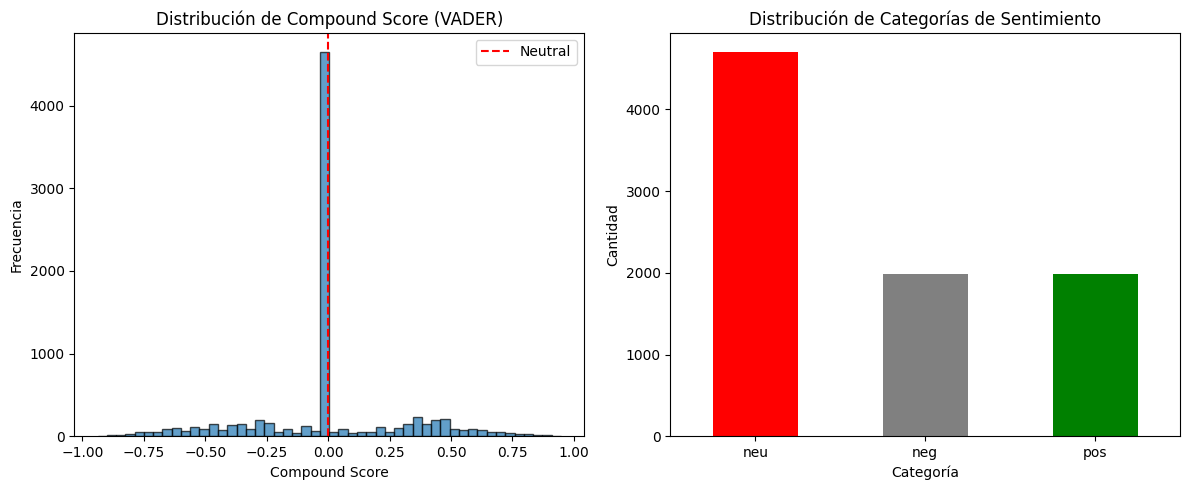

In [11]:
import matplotlib.pyplot as plt

# Histograma de compound score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['compound'], bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Neutral')
plt.xlabel('Compound Score')
plt.ylabel('Frecuencia')
plt.title('Distribución de Compound Score (VADER)')
plt.legend()

plt.subplot(1, 2, 2)
df['label'].value_counts().plot(kind='bar', color=['red', 'gray', 'green'])
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Distribución de Categorías de Sentimiento')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Análisis Detallado de Scores VADER

VADER proporciona 4 métricas:
- **neg**: proporción de sentimiento negativo
- **neu**: proporción de sentimiento neutral  
- **pos**: proporción de sentimiento positivo
- **compound**: score combinado normalizado entre -1 (muy negativo) y +1 (muy positivo)

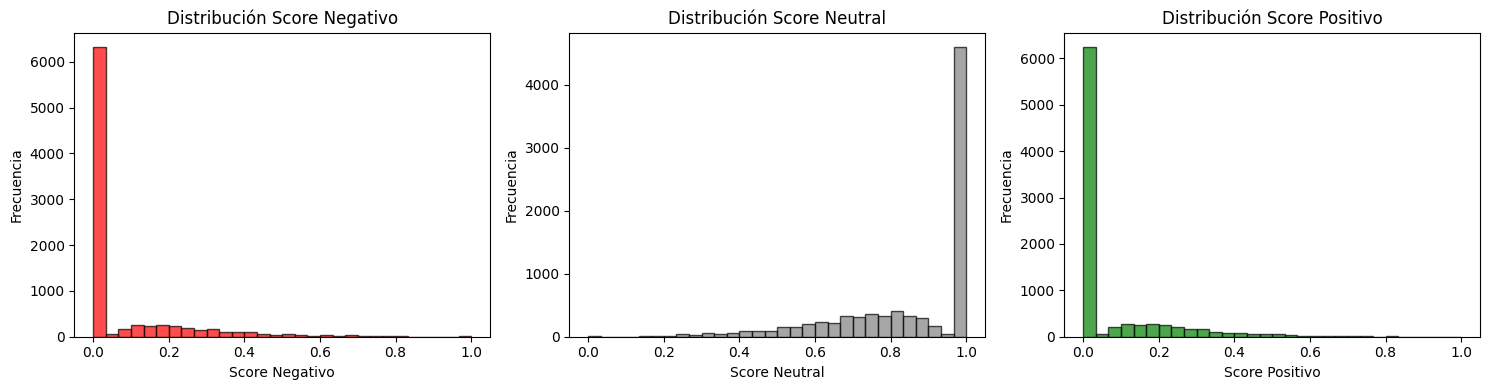

In [12]:
# Distribución de scores individuales
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df['neg'], bins=30, color='red', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución Score Negativo')
axes[0].set_xlabel('Score Negativo')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(df['neu'], bins=30, color='gray', alpha=0.7, edgecolor='black')
axes[1].set_title('Distribución Score Neutral')
axes[1].set_xlabel('Score Neutral')
axes[1].set_ylabel('Frecuencia')

axes[2].hist(df['pos'], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[2].set_title('Distribución Score Positivo')
axes[2].set_xlabel('Score Positivo')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()